In [87]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import numpy as np

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\terah\AppData\Local\Temp\ipykernel_432\2996199404.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [88]:
raw_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSgcOEGH5nEzRQ6zFdiDxB0S3xHtZ8BUR039zmtnw5hj7mfycCHrdIr2hcc_WM4uR_NNS0z7Bg2ho_c/pub?gid=0&single=true&output=csv', usecols=['alpha_3', 'stage', 'reboot', 'subEntities'], na_filter=False)


legend = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSgcOEGH5nEzRQ6zFdiDxB0S3xHtZ8BUR039zmtnw5hj7mfycCHrdIr2hcc_WM4uR_NNS0z7Bg2ho_c/pub?gid=1702276270&single=true&output=csv', usecols=['code', 'label_fr', 'label_en', 'baseColor', 'stripeColor'], na_filter=False)
legend = legend[legend.code != ""]
legend

,code,label_fr,label_en,baseColor,stripeColor
0,NA,Inconnu,Unknown,#d3d3d3,
1,BARBARIANS,Barbares,Barbarians,#a9a9a9,
2,FEUDAL_1,État-nation féodal : émergence du suzerain,Feudal nation state : rise of overlord,#fcfc9f,
3,FEUDAL_2,État-nation féodal : émergence des parlements,Feudal nation state : rise of parliaments,#f0f05b,
4,FEUDAL_3,Pic de puissance féodale,Peak feudal power,#f5e831,
5,CIVIL_WARS,Guerres Civiles,Civil Wars,#f57aa7,
6,ABSOLUTISM_1,Absolutisme : émergence de la bureaucratie,Absolutism : rise of bureaucracy,#ffcc80,
7,ABSOLUTISM_2,Absolutisme : mise au pas des oligarques,Absolutism : squashing the oligarchs,#ffb836,
8,IMPERIAL_ABSOLUTISM,Absolutisme Imperial,Imperial absolutism,#ed9f0e,
9,ANCIEN_REGIME,Ancien Régime,Ancien Régime,#fa8816,


In [89]:
data = raw_data.merge(legend, left_on='stage', right_on='code', how='left')
data = data.drop('code', axis=1)
data.head()

,alpha_3,stage,reboot,subEntities,label_fr,label_en,baseColor,stripeColor
0,AFG,FEUDAL_1,,x,État-nation féodal : émergence du suzerain,Feudal nation state : rise of overlord,#fcfc9f,
1,ZAF,FEUDAL_2,,x,État-nation féodal : émergence des parlements,Feudal nation state : rise of parliaments,#f0f05b,
2,ALB,NA,,,Inconnu,Unknown,#d3d3d3,
3,DZA,ANCIEN_REGIME,,,Ancien Régime,Ancien Régime,#fa8816,
4,DEU,DEMOCRACY_YOUNG,,,Démocratie parlementaire jeune,Young parliamentary democracy,#1fb2ed,


In [90]:
# Merge with the countries DataFrame
world_merged = world.merge(data, left_on='iso_a3', right_on="alpha_3", how='left')

# Default color for other countries
world_merged['baseColor'].fillna('lightgrey', inplace=True)
world_merged.loc[pd.isna(world_merged['stripeColor']), 'stripeColor'] = ''
world_merged['stripe'] = world_merged['stripeColor'] != ''
world_merged.loc[world_merged['stripeColor'] == '', 'stripeColor'] = '#00000000'
world_merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,alpha_3,stage,reboot,subEntities,label_fr,label_en,baseColor,stripeColor,stripe
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,NA,,,Inconnu,Unknown,#d3d3d3,#00000000,False
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,NATIONAL_REVOLUTION_6,,,Révolution nationale : restauration,National revolution : restoration,#a52fb5,#00000000,False
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,lightgrey,#00000000,False
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,DEMOCRACY_MATURE,,,Démocratie parlementaire mature,Mature parliamentary democacry,#3969f7,#00000000,False
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,OLIGARCHIC_REPUBLIC_2,,,République oligarchique : réémergence du pouvo...,Oligarchic republic : re-emergence of central ...,#076e07,#00000000,False


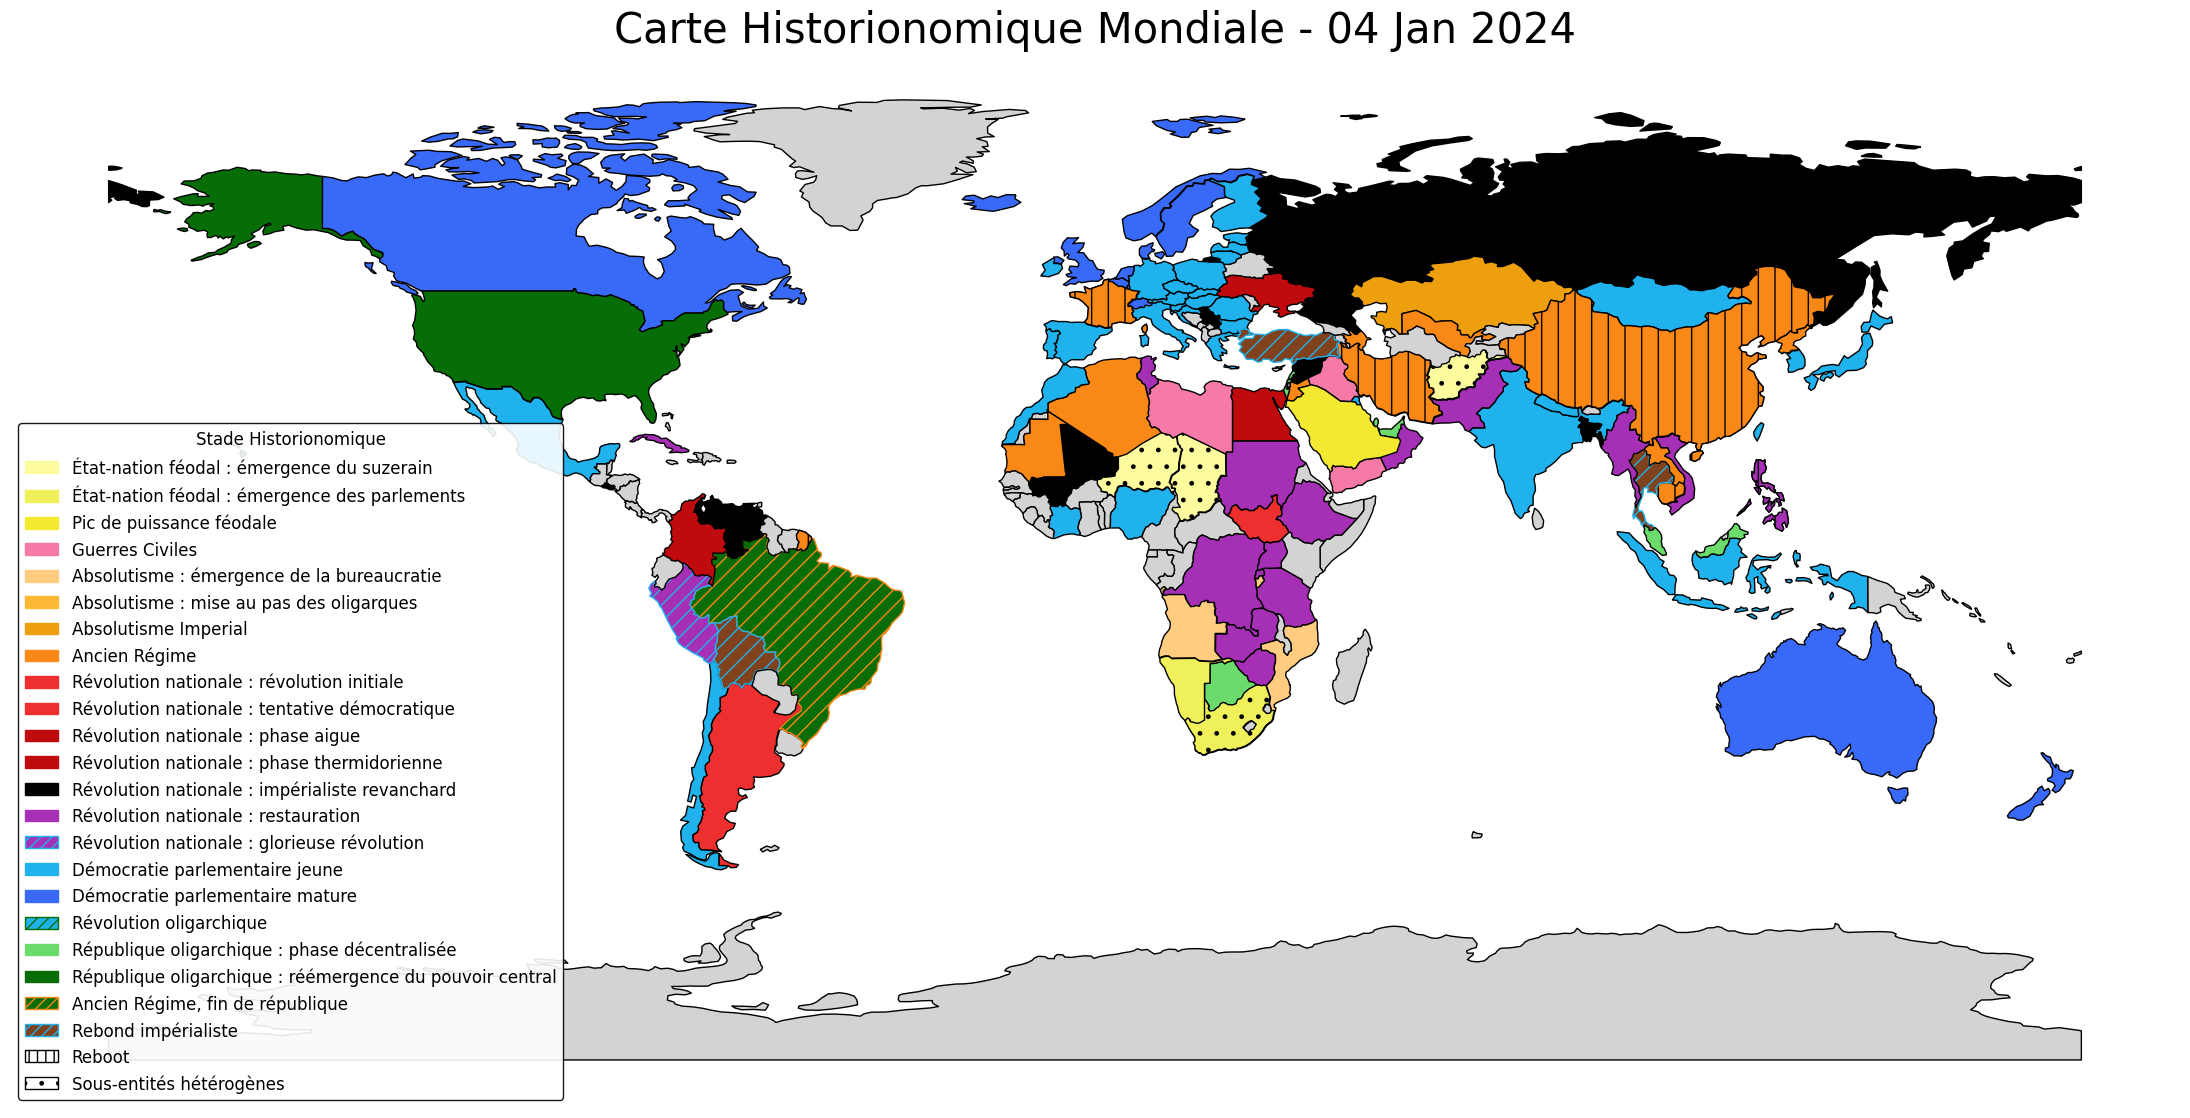

In [95]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(28, 14))
# world_merged.plot(facecolor=world_merged['baseColor'], edgecolor=world_merged['stripeColor'], ax=ax, hatch=world_merged['stripe'])

# # Iterate through the DataFrame and plot each country
for feature in world_merged.iterfeatures():
    
    # Extract attributes
    idx = feature['id']
    geom = feature['geometry']
    properties = feature['properties']
    baseColor = properties['baseColor']
    stripeColor = properties['stripeColor']
    stripe = properties['stripe']
    reboot = properties['reboot']
    subEntities = properties['subEntities']
    if stripe:
        world_merged.iloc[[idx]].plot(ax=ax, facecolor=baseColor, edgecolor=stripeColor, hatch='//')
    else:
        world_merged.iloc[[idx]].plot(ax=ax, color=baseColor,  edgecolor='black')
    if reboot:
        world_merged.iloc[[idx]].plot(ax=ax, facecolor=baseColor, edgecolor='black', hatch='|')
    if subEntities:
        world_merged.iloc[[idx]].plot(ax=ax, facecolor=baseColor, edgecolor='black', hatch='.')




# Create a list of patches for the legend
patches = [
    mpatches.Patch(facecolor=l.baseColor, edgecolor=l.stripeColor, hatch='///', label=l.label_fr) if l.stripeColor != '' else
    mpatches.Patch(color=l.baseColor, label=l.label_fr) 
    for l in legend.itertuples()]
patches.append(mpatches.Patch(facecolor='white', edgecolor='black', hatch='||', label='Reboot')) 
patches.append(mpatches.Patch(facecolor='white', edgecolor='black', hatch='.', label='Sous-entités hétérogènes')) 

# Add the legend to the plot
l = ax.legend(handles=patches[2:], loc='lower left',title='Stade Historionomique', fontsize='large', title_fontsize='large', edgecolor='black')
l.get_frame().set_alpha(0.9)

date = datetime.now().strftime("%d %b %Y")
title = f"Carte Historionomique Mondiale - {date}"

ax.set_title(title, fontsize=30, color='black')
ax.set_axis_off()

plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()
